### RLC circuit model

Transient simulation of a simple RLC circuit in a form of a system of ordinary differential equations.
The goal here is to investigate how to integrate the model with Finite Element Method.

In [1]:
# Stub file generated with: PLECS 4.5.8

In [2]:
N = 2 # state variables
M = 1 # output variables

rlc_D_double = zeros(N)
# state vector
rlc_PM0_x = zeros(N)
rlc_PM0_prevX = zeros(N)
# input variable vector?
rlc_PM0_u = zeros(M)
rlc_PM0_prevU = zeros(M)
# output variable vector
rlc_PM0_y = zeros(M)
nothing

In [3]:
using SparseArrays
rlc_PM0_A  = [-0.603658536585365835 -0.0182926829268292568
               0.182926829268292568 -0.58536585365853655]
rlc_PM0_B0 = [-0.140243902439024404; 0.762195121951219523]
rlc_PM0_B1 = [ 0.158536585365853661; 0.823170731707317138]
nothing

In [4]:
function rlc_PM0_update(A, B0, B1, x)
   global rlc_PM0_prevX
   global rlc_PM0_prevU
   global rlc_PM0_u
   x .= A  * rlc_PM0_prevX #=
   =#.+ B0.* rlc_PM0_prevU #=
   =#.+ B1.* rlc_PM0_u
   return nothing
end                

rlc_PM0_update (generic function with 1 method)

In [5]:
# global variables
rlc_first = true;
rlc_sampleTime = 0.001;

In [6]:
function rlc_initialize(time)
   global rlc_D_double
   global rlc_PM0_x
   global rlc_first
    
   rlc_tickHi = time/4294967296.0/rlc_sampleTime |> floor;
   remainder  = time-4294967296.0*rlc_sampleTime * rlc_tickHi;
   
   rlc_tickLo =  remainder / rlc_sampleTime |> ceil;
   remainder -= rlc_tickLo * rlc_sampleTime;
   if abs(remainder) > 1e-6abs(time)
      println("Start time must be an integer multiple of the base sample time.")
   end
    
   # Initialization for Sine Wave Generator : 'rlc/Sine Wave'
   rlc_D_double[1] = sin(10.0 * 3.14159265358979312 * time);
   rlc_D_double[2] = cos(10.0 * 3.14159265358979312 * time);

   # Initialization for Subsystem : 'rlc'
   rlc_PM0_x .= [0.0, 0.0]
   rlc_first = true
   return nothing
end

rlc_initialize (generic function with 1 method)

In [7]:
function rlc_step()
   global rlc_first
   global rlc_PM0_A
   global rlc_PM0_x
   global rlc_PM0_y
   global rlc_PM0_u
   global rlc_PM0_B0
   global rlc_PM0_B1
   
   # Sine Wave Generator : 'rlc/Sine Wave'
   rlc_B_SineWave = 0. + 1.0 * (1.0 * rlc_D_double[1] + 0.0 * rlc_D_double[2]);

   # electrical input?
   rlc_PM0_u[1]=rlc_B_SineWave; # Voltage Source (Controlled) : 'rlc/V'
   
   if rlc_first == false
      rlc_PM0_prevX .= rlc_PM0_x
      rlc_PM0_update(rlc_PM0_A,
                     rlc_PM0_B0,
                     rlc_PM0_B1,
                     rlc_PM0_x);
   end
   # electrical output?
   rlc_PM0_y[1] = 1.0 * rlc_PM0_x[1];
   
   rlc_first = false

   # Update for Sine Wave Generator : 'rlc/Sine Wave' */
   let
      scaling = 1. + 0.5(rlc_D_double[1]*rlc_D_double[1] +
                         rlc_D_double[2]*rlc_D_double[2] - 1.);
      scaledX = rlc_D_double[1] / scaling;
      scaledY = rlc_D_double[2] / scaling;
      rlc_D_double[1] = 0.9995065603657316000 * scaledX +
                        0.0314107590781282919 * scaledY;
      rlc_D_double[2] =-0.0314107590781282919 * scaledX +
                        0.9995065603657316000 * scaledY;
   end

   # Update for Subsystem : 'rlc'
   rlc_PM0_u[1]   = rlc_B_SineWave; # Voltage Source (Controlled) : 'rlc/V'
   rlc_PM0_prevU .= rlc_PM0_u
end

rlc_step (generic function with 1 method)

In [8]:
rlc_terminate() = return nothing

rlc_terminate (generic function with 1 method)

In [9]:
using Printf

T = 50
u = zeros(T)
y = zeros(T)
t = range(0, stop=T-1) * rlc_sampleTime

rlc_initialize(first(t))
println("    u     y     ")
println("================")
for i=1:T
    rlc_step()
    u[i] = rlc_PM0_u[1]
    y[i] = rlc_PM0_y[1]
    @printf("%+07.3g %+07.3g\n", u[i], y[i])
end
rlc_terminate()

    u     y     
+000000 +000000
+0.0314 +0.00498
+0.0628 +0.00207
+0.0941 +0.00374
+00.125 +0.00277
+00.156 +0.0033
+00.187 +0.00298
+00.218 +0.00313
+00.249 +0.00302
+00.279 +0.00304
+00.309 +0.00298
+00.339 +0.00296
+00.368 +0.00292
+00.397 +0.00289
+00.426 +0.00285
+00.454 +0.00281
+00.482 +0.00276
+00.509 +0.00271
+00.536 +0.00266
+00.562 +0.00261
+00.588 +0.00255
+00.613 +0.00249
+00.637 +0.00243
+00.661 +0.00237
+00.685 +0.0023
+00.707 +0.00223
+00.729 +0.00216
+000.75 +0.00209
+00.771 +0.00201
+000.79 +0.00194
+00.809 +0.00186
+00.827 +0.00178
+00.844 +0.00169
+00.861 +0.00161
+00.876 +0.00152
+00.891 +0.00144
+00.905 +0.00135
+00.918 +0.00126
+000.93 +0.00117
+00.941 +0.00108
+00.951 +0.000983
+000.96 +0.000889
+00.969 +0.000794
+00.976 +0.000698
+00.982 +0.000601
+00.988 +0.000504
+00.992 +0.000406
+00.996 +0.000308
+00.998 +0.00021
+000001 +0.000112


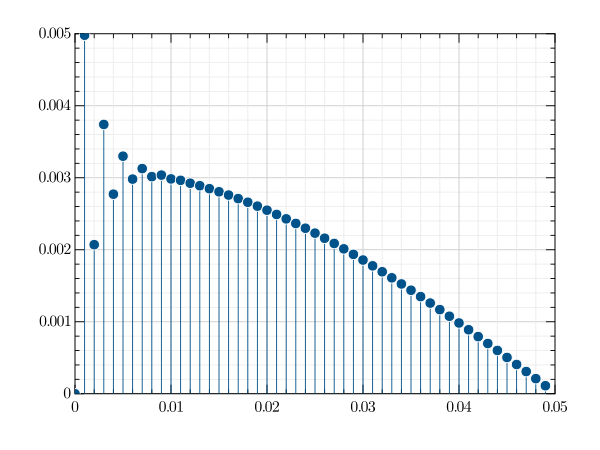

In [10]:
using GR
stem(t, y)